# Analysis of U.S. Car Accidents between 2016 and 2020
### Author: Annette K.


**Data Source:** https://www.kaggle.com/sobhanmoosavi/us-accidents

Description: "Car accident data was collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within road-networks. There are about 3.5 million accident records in the dataset, covering 49 states of the USA."

**Citations:**
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.


# Table of Contents
### 1. Import Libraries
- [Import Libraries](#ImportLibraries)

### 2. Load Data 
- [Load and Inspect Data](#LoadData)

### 3. Pre-Process Time Variable
- [3.1 Extract Day of Week](#DayOfWeek)
- [3.2 Extract Date](#Date)
- [3.3 Extract Time of Day](#TimeOfDay)
- [3.4 Extract Hour of Day](#HourOfDay)
- [3.5 Identify U.S. Holidays](#Holidays)

### 4. Group Variables by Data
- [Group Variables](#DataType)

### 5. Data Visualizations
- [5.1 Data Source](#DataSource)
- [5.2 Accident Severity](#Severity)
- [5.3 Categorical Weather Variables](#WeatherCatVars)
- [5.4 Numerical Weather Variables](#WeatherNumVars)
- [5.5 Categorical Road Variables](#RoadCatVars)
- [5.6 Accident 'Start Time' Variables](#5.6)
- [5.7 Location Variables](#LocationVars)

### 6. Feature Engineering 
- [Create New Features](#FeatureEngineering)

### 7. Handle Missing Values 
- [Handle Missing Values](#MissingVals)

### 8. Correlation Matrix 
- [Inspect Correlation Matrix](#Correlation)

<a id='ImportLibraries'></a>
# 1. Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pickle

<a id='LoadData'></a>
# 2. Load and Inspect Data

In [22]:
df = pd.read_csv("US_Accidents_2016 to 2020.csv")

In [23]:
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [24]:
df.shape

(3513617, 49)

In [25]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

<a id='TimeVars'></a>
# 3. Pre-process Time Variable

In [28]:
import datetime  

In [29]:
df['Start_Time']= pd.to_datetime(df['Start_Time'])

<a id='DayOfWeek'></a>
### 3.1 Extract Day of Week

In [75]:
df['day_of_week'] = df['Start_Time'].dt.day_name()

'Monday'

<a id='Date'></a>
### 3.2. Extract Date

In [31]:
df['Start_Date'] = df['Start_Time'].dt.date

In [32]:
#Convert to date/time format
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Start_Date'].dtype

dtype('<M8[ns]')

<a id='TimeOfDay'></a>
### 3.3 Extract Time of Day

In [33]:
df['time_of_day'] = df['Start_Time'].dt.time

<a id='HourOfDay'></a>
### 3.4 Extract Hour of Day

In [34]:
df['hour_of_day'] = df['Start_Time'].dt.hour

<a id='Holidays'></a>
### 3.5 Identify U.S. Federal Holidays (2016 to 2020)

In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [36]:
cal = calendar()
holidays = cal.holidays(start=df['Start_Date'].min(), end=df['Start_Date'].max())

In [37]:
df['Holiday'] = df['Start_Date'].isin(holidays)

In [76]:
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Start_Date,time_of_day,hour_of_day,Holiday
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday,2016-02-08,05:46:00,5,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday,2016-02-08,06:07:59,6,False


In [39]:
df['Holiday'].value_counts()

False    3437209
True       76408
Name: Holiday, dtype: int64

In [40]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'day_of_week', 'Start_Date', 'time_of_day',
       'hour_of_day', 'Holiday'],
      dtype='object')

In [41]:
#Save file to pickle
df.to_pickle('df_date_processed.pkl')

**Restart Point**

In [42]:
#df = pd.read_pickle('df_date_processed.pkl') #Reading from pickle file

In [43]:
#df.head(2)

<a id='DataType'></a>
# 4. Group Variables by Data Type

**Identify Road-Related Categorical Variables**

In [44]:
road_cat_vars = df[['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

**Identify Weather-Related Categorical Variables**

In [45]:
weather_cat_vars = df[['Wind_Direction','Weather_Condition','Sunrise_Sunset', 
               'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']]

**Identify Weather and Time-Related Numerical Variables**

In [46]:
weather_num_vars = df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]

# 5. Data Visualizations

<a id='DataSource'></a>
### 5.1 Data Source

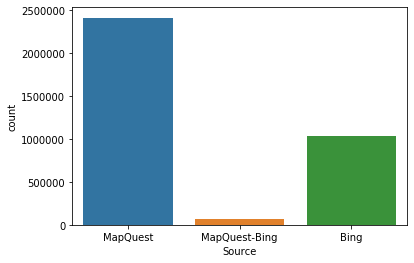

In [47]:
sns.countplot(df['Source'])

<a id='Severity'></a>
### 5.2 Inspect Accident Severity Variables

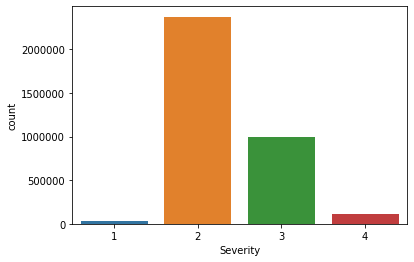

In [48]:
sns.countplot(df['Severity'])

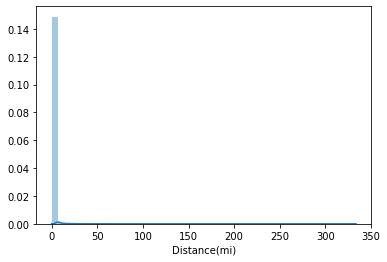

In [49]:
sns.distplot(df['Distance(mi)'])

In [173]:
# Inspect incident with maximum impact on traffic
df[df['Distance(mi)'] == df['Distance(mi)'].max()]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Start_Date,time_of_day,hour_of_day,Holiday,precipitation_data_present,end_coordinates_present,windchill_data_present
1706683,A-1706716,MapQuest,201.0,3,2018-08-11 12:44:43,2018-08-11 13:14:17,33.084515,-80.65255,NaN,NaN,333.630005,Accident on I-95 Southbound from Exit 77 Hodge...,NaN,I-95 N,R,Walterboro,Colleton,SC,29488,US,US/Eastern,KRBW,2018-08-11 12:35:00,87.8,NaN,66.0,29.98,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Saturday,2018-08-11,12:44:43,12,False,False,False,False


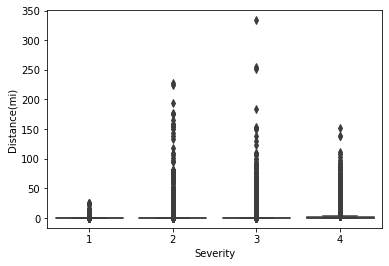

In [51]:
sns.boxplot(data =df, x ='Severity', y ='Distance(mi)')

<a id='WeatherCatVars'></a>
### 5.3 Inspect Categorical Weather Variables

In [98]:
def plot_categorical(dfa,var):
    dfa = dfa.copy()
    plt.figure(figsize=(7,df[var].nunique()/3))
    
    sns.countplot(data = dfa, y = var, order = dfa[var].value_counts().index )
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [99]:
#plot_categorical(df, 'Weather_Condition' ) 

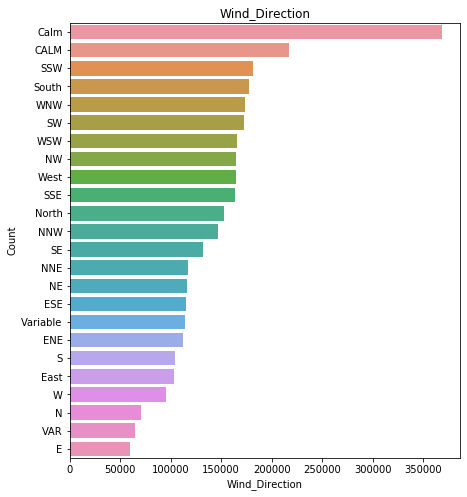

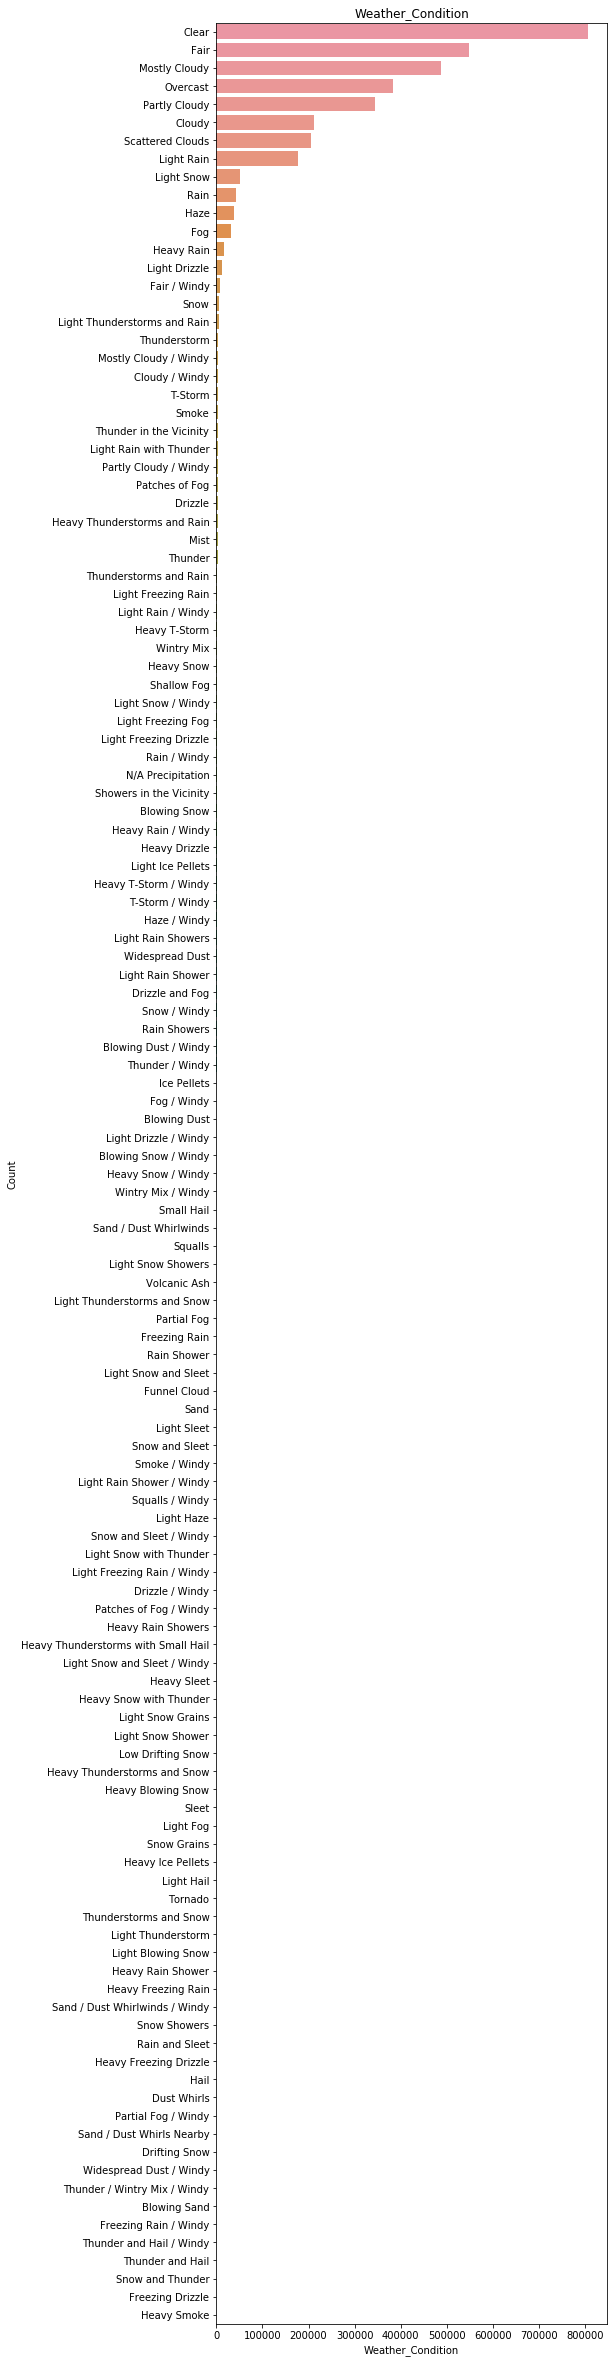

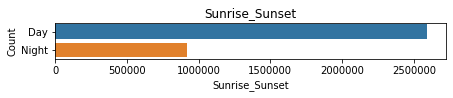

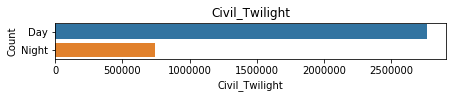

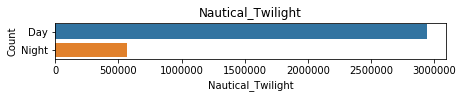

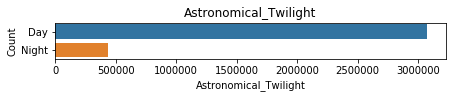

In [100]:
for var in weather_cat_vars:
    plot_categorical(df, var ) 

<a id='WeatherNumVars'></a>
### 5.4 Inspect Numerical Weather Variables

In [55]:
def plot_numerical(dfa,var):
    dfa = dfa.copy()
    
    sns.boxplot(data = dfa,x = 'Severity', y = var  )
    plt.title(var)
    plt.xlabel('Severity')
    plt.show()

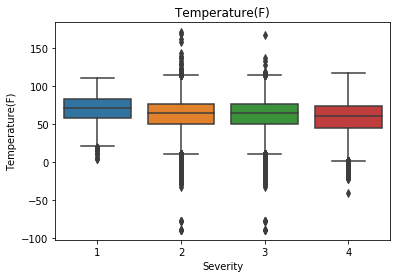

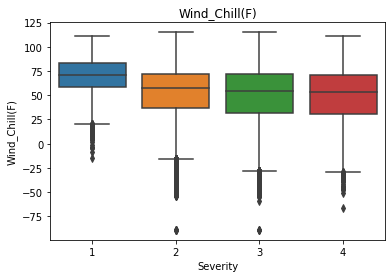

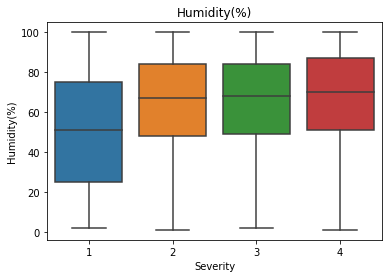

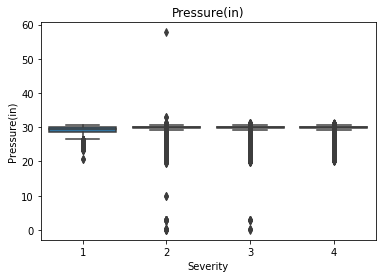

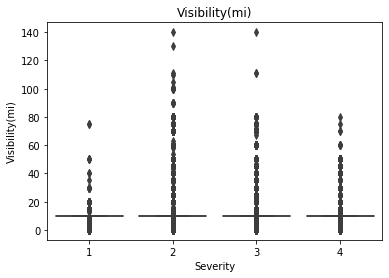

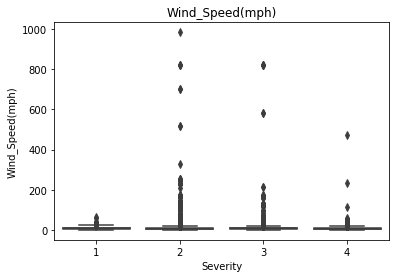

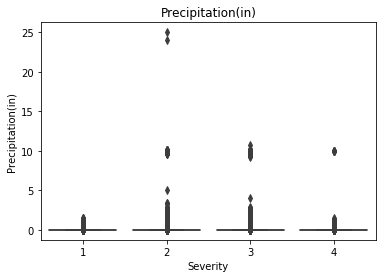

In [63]:
for var in weather_num_vars:
    plot_numerical(df, var )

<a id='RoadCatVars'></a>
### 5.5 Inspect Categorical Road Variables

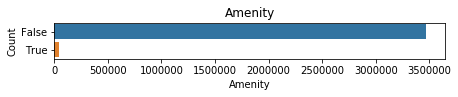

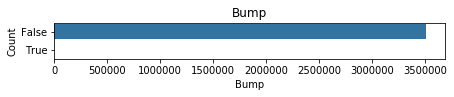

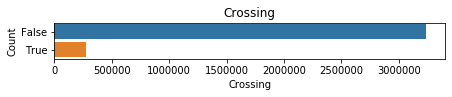

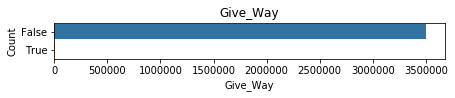

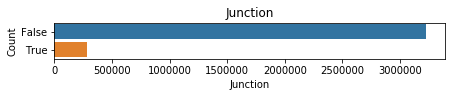

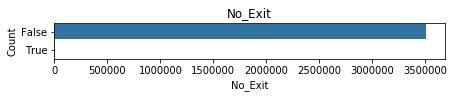

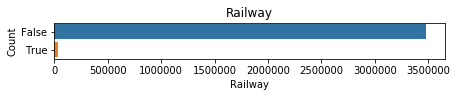

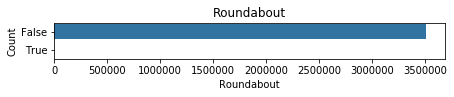

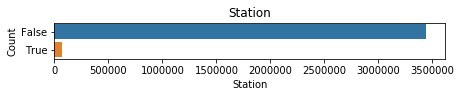

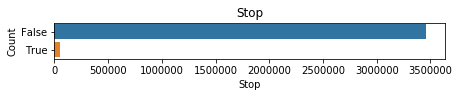

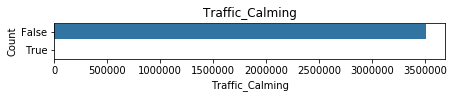

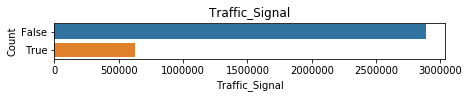

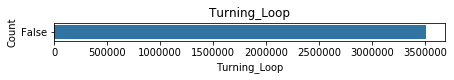

In [101]:
for var in road_cat_vars:
    plot_categorical(df, var ) 

<a id='5.6'></a>
### 5.6 Inspect 'Accident Start Time'Variables

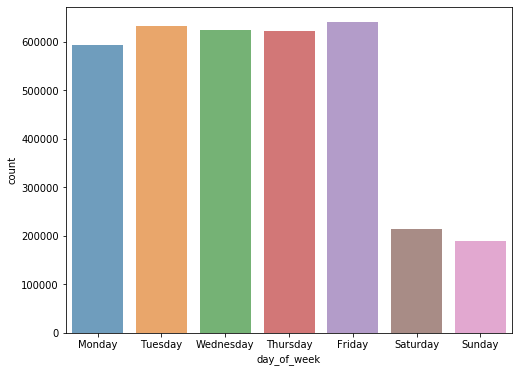

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(df['day_of_week'], alpha = 0.7)
#Consider creating 'weekend/weekday' variable

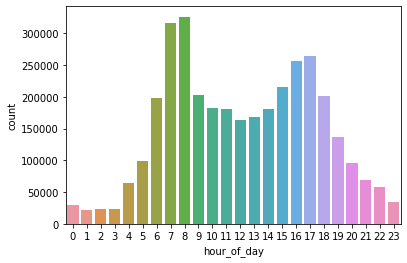

In [88]:
sns.countplot(df['hour_of_day'])
# Rush-hour seems to impact number of accidents

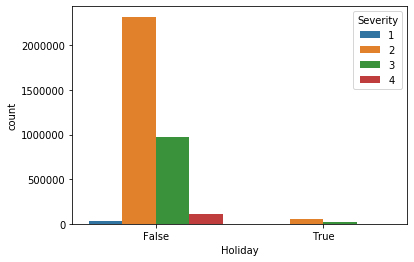

In [60]:
sns.countplot(data=df , x ='Holiday', hue = 'Severity')

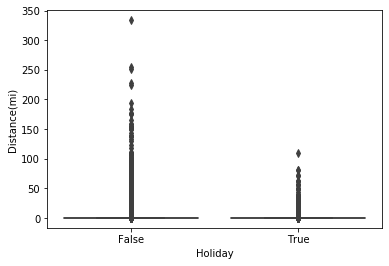

In [61]:
sns.boxplot(data=df , x ='Holiday', y = 'Distance(mi)')

In [62]:
# 'day_of_week', 'hour_of_day', 'Start_date', 'Holiday'

<a id='LocationVars'></a>
### 5.7 Inspect Location Variables

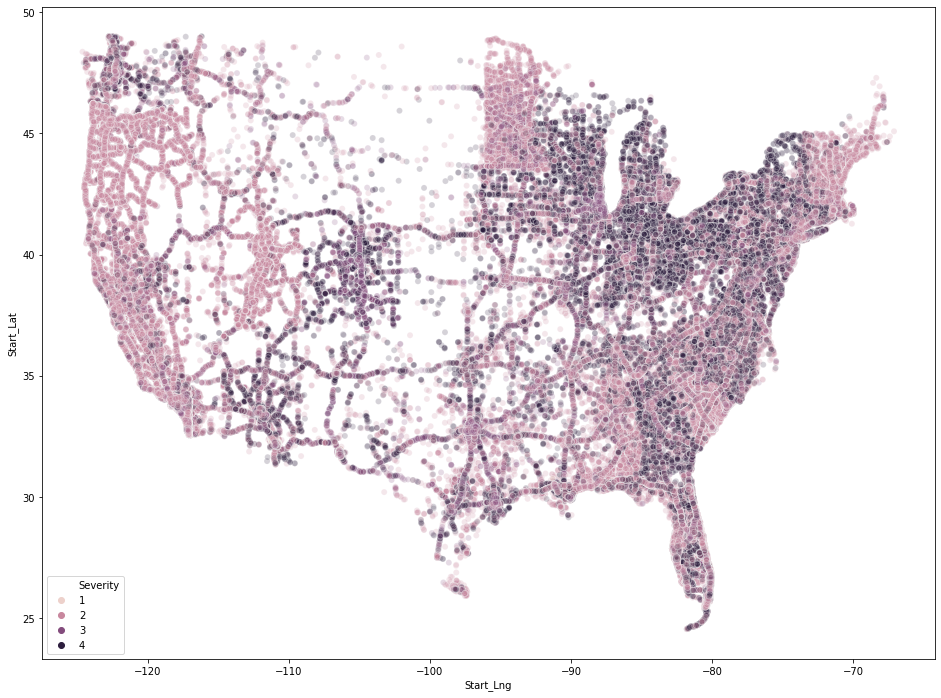

In [172]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x = 'Start_Lng', y = 'Start_Lat', alpha = 0.2, hue = 'Severity')

In [96]:
location_cat_vars = df[['Side','State','Timezone']]

In [103]:
location_cat_vars.nunique() 
# City - 11,895 unique values
# Street - 176,262 " "
# County - 1,724
# Airport_Code: 2,001

Side         3
State       49
Timezone     4
dtype: int64

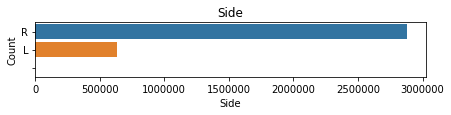

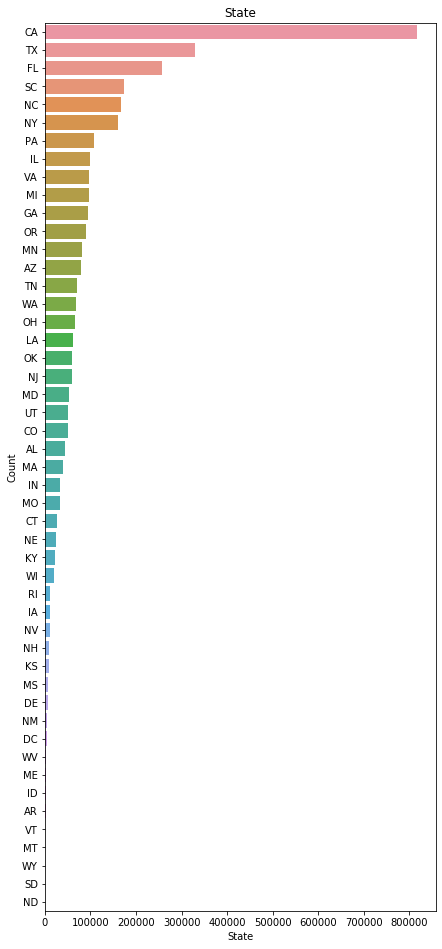

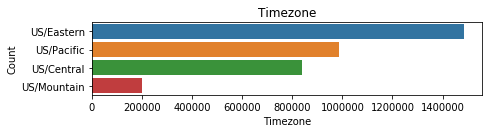

In [102]:
for var in location_cat_vars:
    plot_categorical(df,var)

<a id='FeatureEngineering'></a>
# 6. Feature Engineering

In [132]:
#Create new precipitation column (58% missing vals)
df['precipitation_data_present'] = df['Precipitation(in)'].notnull()

In [176]:
#Tag whether end accident GPS coordinates were present (70% missing vals)
df['end_coordinates_present'] = df['End_Lat'].notnull()

In [140]:
#Tag whether wind chill data was present (11% missing vals)
df['windchill_data_present'] = df['Wind_Chill(F)'].notnull()

In [142]:
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Start_Date,time_of_day,hour_of_day,Holiday,precipitation_data_present,end_coordinates_present,windchill_data_present
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday,2016-02-08,05:46:00,5,False,True,False,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday,2016-02-08,06:07:59,6,False,True,False,False
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,Monday,2016-02-08,06:49:27,6,False,False,False,True


<a id='MissingVals'></a>
# 7. Handle Missing Values 

In [136]:
abs(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

End_Lat                       70.548896
End_Lng                       70.548896
Number                        64.402694
Precipitation(in)             57.657793
Wind_Chill(F)                 53.171675
TMC                           29.451104
Wind_Speed(mph)               12.938490
Weather_Condition              2.166941
Visibility(mi)                 2.158915
Humidity(%)                    1.983341
Temperature(F)                 1.870779
Wind_Direction                 1.675595
Pressure(in)                   1.590441
Weather_Timestamp              1.233003
Airport_Code                   0.192337
Timezone                       0.110428
Zipcode                        0.030424
Sunrise_Sunset                 0.003273
Civil_Twilight                 0.003273
Astronomical_Twilight          0.003273
Nautical_Twilight              0.003273
City                           0.003188
Description                    0.000028
Side                           0.000000
County                         0.000000


**Drop columns with more than 11% missing values: End_Lat, End_Lng, Number, 
Precipitation(in), Wind_Chill, TMC, Wind_Speed, Turning_Loop(All False)**

In [154]:
df_new = df.drop(['End_Lat','End_Lng','Number',
                  'Precipitation(in)','Wind_Chill(F)',
                  'TMC','Wind_Speed(mph)','Turning_Loop'], axis=1)

In [155]:
df_new.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Start_Date,time_of_day,hour_of_day,Holiday,precipitation_data_present,end_coordinates_present,windchill_data_present
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday,2016-02-08,05:46:00,5,False,True,False,False
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,100.0,29.65,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday,2016-02-08,06:07:59,6,False,True,False,False
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,Monday,2016-02-08,06:49:27,6,False,False,False,True
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,Monday,2016-02-08,07:23:34,7,False,False,False,True
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,Monday,2016-02-08,07:39:07,7,False,False,False,True


**Drop all other rows with missing values**

In [156]:
df_new = df_new.dropna(axis=0)

In [157]:
df_new.shape

(3402755, 49)

**Original data frame: 3,513,617 rows X 50 columns
Final data frame: 3,402,755 rows X 50 columns**

(3.15% of data lost due to missing values)

<a id='Correlation'></a>
# 8. Correlation Matrix

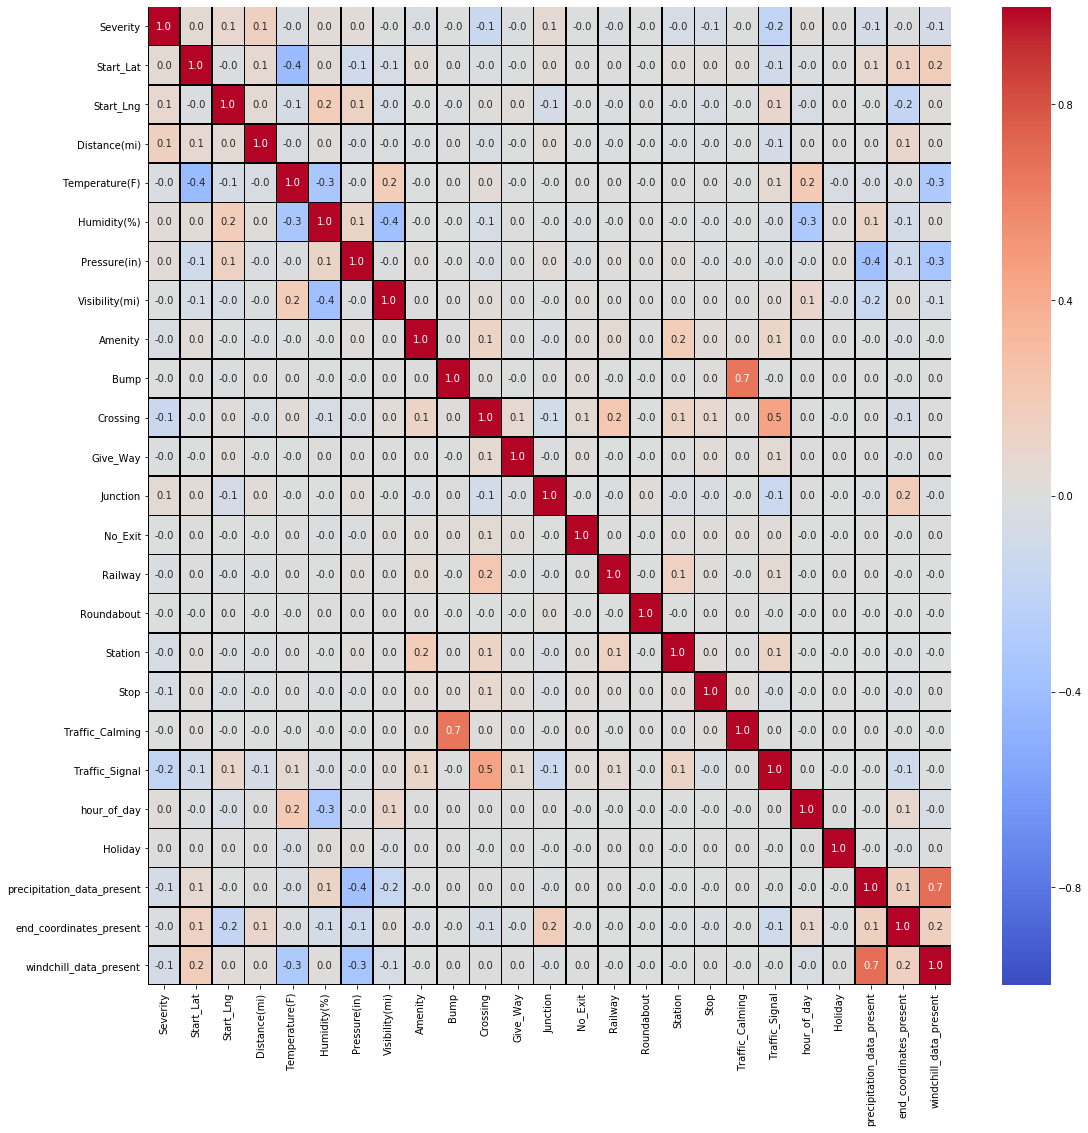

In [167]:
plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot=True, fmt = '.1f', vmin=-1, vmax=1, center= 0,
           cmap= 'coolwarm', linewidths=0.5, linecolor='black')

In [163]:
# Show lower half of correlation matrix triangle

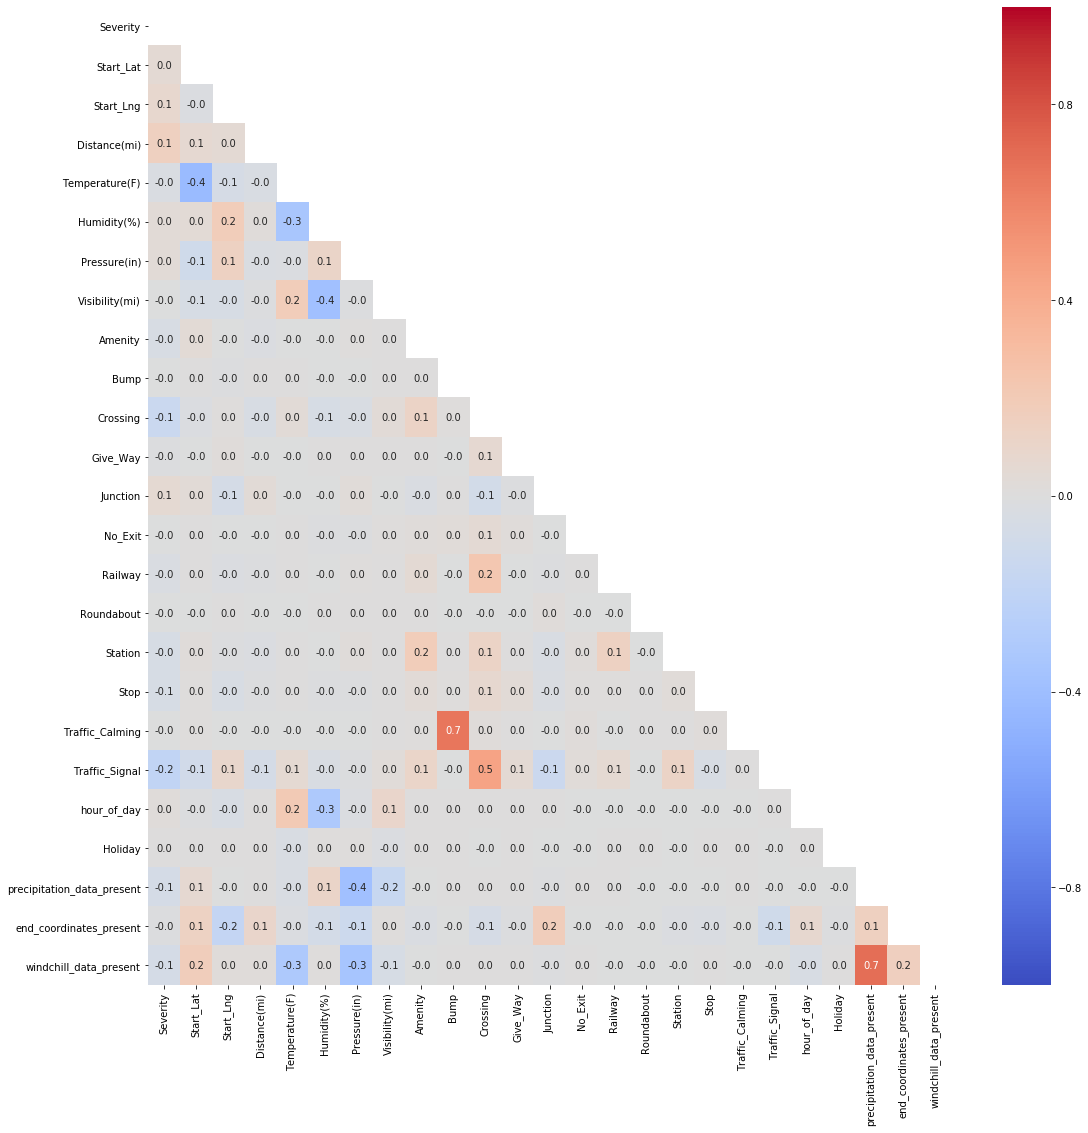

In [168]:
matrix = np.triu(df_new.corr())
plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot=True, mask=matrix,fmt = '.1f', vmin=-1, vmax=1, center= 0,
           cmap= 'coolwarm')

In [171]:
# Goal: minimize multicollinearity during model building 
# e.g. Traffic Calming and Bump variables provide redundant data

**Save to pickle file for future modeling steps**

In [174]:
#Save file to pickle
df_new.to_pickle('accident_data_after_EDA.pkl')

In [ ]:
# Pickle is a serialized way of storing a an exact representation of a Pandas dataframe to disc. 
# The types of the columns are the same and the index is the same. 
# Some information would be lost if simply saved as csv/excel